

# Project: The Movie Database (TMDb) Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **In this projects**, I'll be analysing data associotaed with The Movie Database (TMBD) data set which includes infromation about movies.

> I'll answer questions: The relationship between release date and profitability and Which directors have directed the most movies?

In [1]:
# import packages needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, I'll check the data for the dataset.

### General Properties

In [2]:
# Load data
md = pd.read_csv('tmdb-movies.csv')
# Check Data
md.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# Check number of coulmns and rows
md.shape

(10866, 21)

In [4]:
# Check some statiitical information
md.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
# Check Data Types,and number of rows
md.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [6]:
# Check if there are any duploicated rows
sum(md.duplicated())

1

> **After Data Wrangling Process**:
- I noticed, the revenue and budget coulmns has a min value as zero.
- There is one duplicated row

### Data Cleaning 

####  (1) Drop Unused Coulmns

In [7]:
# First, I'll drop unused coulmns from the data set to answer my question
md.drop (['imdb_id','popularity','cast','homepage','tagline','keywords','overview','genres','production_companies','release_date','runtime','vote_count','budget_adj','revenue_adj'], axis=1, inplace=True)

####  (2) Drop Duplicates

In [8]:
# Second, I'll drop duplicate row
md.drop_duplicates (inplace = True)

####  (3) Fill in Zero Values with the Mean

In [9]:
# Third, I'll fill the zero values with the mean for the coulmns below
md['budget'] = md['budget'].replace(0,md['budget'].mean())
md['revenue'] = md['revenue'].replace(0,md['revenue'].mean())

####  (4) View Data after cleaning

In [10]:
# Fourth, Checking the statistical information
md.describe()

,id,budget,revenue,vote_average,release_year
count,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000
mean,66066.374413,2.229110e+07,6.187923e+07,5.975012,2001.321859
std,92134.091971,2.801385e+07,1.110236e+08,0.935138,12.813260
min,5.000000,1.000000e+00,2.000000e+00,1.500000,1960.000000
25%,10596.000000,1.462429e+07,3.982690e+07,5.400000,1995.000000
50%,20662.000000,1.462429e+07,3.982690e+07,6.000000,2006.000000
75%,75612.000000,1.500000e+07,3.982690e+07,6.600000,2011.000000
max,417859.000000,4.250000e+08,2.781506e+09,9.200000,2015.000000


In [11]:
# Fifth, Checking the rows
md.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 7 columns):
id                10865 non-null int64
budget            10865 non-null float64
revenue           10865 non-null float64
original_title    10865 non-null object
director          10821 non-null object
vote_average      10865 non-null float64
release_year      10865 non-null int64
dtypes: float64(3), int64(2), object(2)
memory usage: 679.1+ KB


<a id='eda'></a>
## Exploratory Data Analysis

> **In this section**: I'll answer questions mentioned before

### Q1: What is the Relationship between Release Date and Profitability

In [12]:
# To Answer this question, first we need to calculate the Profit
md['Profit'] = (md['revenue'] - md['budget'])

In [13]:
# To make sure the coulmn is added
md.head()

,id,budget,revenue,original_title,director,vote_average,release_year,Profit
0,135397,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,6.5,2015,1.363529e+09
1,76341,150000000.0,3.784364e+08,Mad Max: Fury Road,George Miller,7.1,2015,2.284364e+08
2,262500,110000000.0,2.952382e+08,Insurgent,Robert Schwentke,6.3,2015,1.852382e+08
3,140607,200000000.0,2.068178e+09,Star Wars: The Force Awakens,J.J. Abrams,7.5,2015,1.868178e+09
4,168259,190000000.0,1.506249e+09,Furious 7,James Wan,7.3,2015,1.316249e+09


In [14]:
# Get the sum of profit per year
release_profit = md.groupby('release_year')['Profit'].sum()

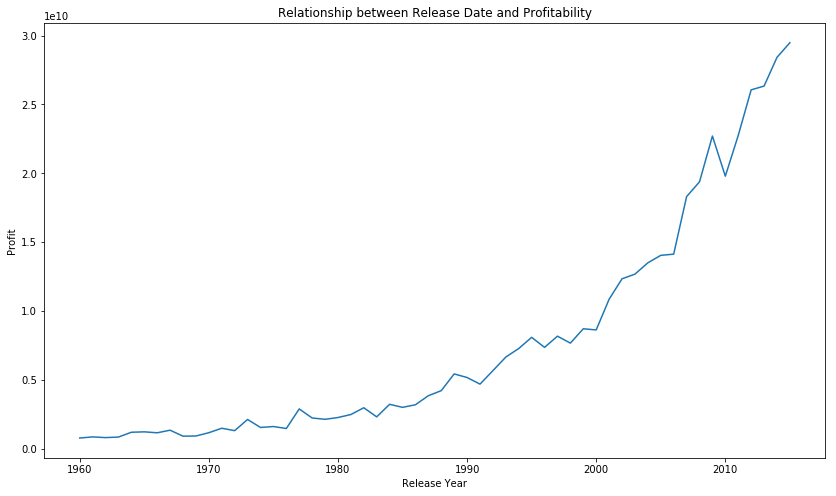

In [15]:
# Specifying x and y labels chart title and Display the chart
plt.subplots(figsize =(14,8))
plt.xlabel('Release Year')
plt.ylabel('Profit')
plt.title('Relationship between Release Date and Profitability')
plt.plot(release_profit)
plt.show()

##### As the chart displays, we can see that after year 2000 movies profitability increases over time.

### Q2:  Which Directors have Directed the Most Movies?

In [16]:
# Get number of movies foreach director
numberofmovies = md.groupby('director')['id'].count()
# Select the first eight directors whos directed the most
numberofmovies = numberofmovies.nlargest (n=8)

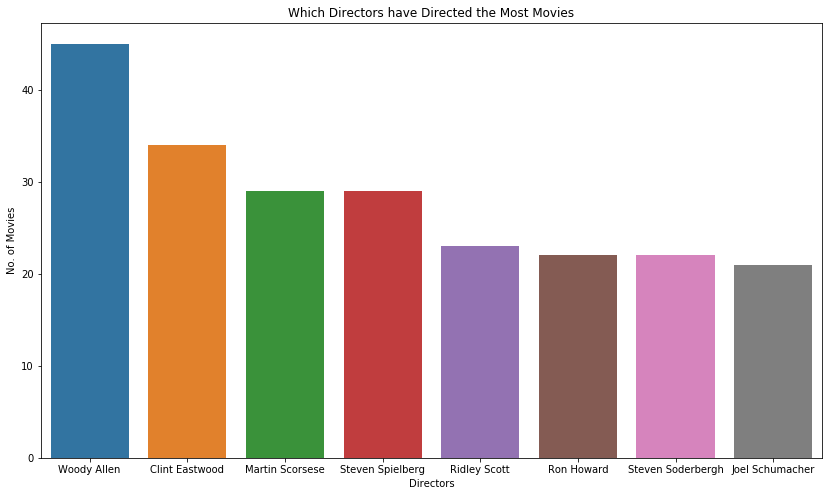

In [17]:
# Specifying x and y labels chart title, figure size and Display the chart
plt.subplots(figsize =(14,8))
Bar = sns.barplot (numberofmovies.index,numberofmovies.tolist())
Bar.set_xlabel ('Directors')
Bar.set_ylabel ('No. of Movies')
Bar.set_title('Which Directors have Directed the Most Movies');

##### As the chart displays, Woody Allen directed more than 40 movies.

<a id='conclusions'></a>
## Conclusions

> **1**: From the first question we mentioned in the introduction, we can say that Movies over time are being more profitability and profits rapidly increases after year 2002.

> **2**: From the second question and as the chart displays Director: Woody Allen directed more than 40 movies, following him Director Clint Eastwood with more than 30 movies. and for the others in top eight, they have been directed movies between 20 to 30 movies.

## Limitation
> **1**: One limitation is in my mind which is the accuracy of data and if its 100% correct or not, and that may affect our readings and explanations. 

In [18]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0